# Logistic Regression with the Titanic Dataset
This example demonstrates how to build a logistic regression model from scratch using the Titanic dataset from Seaborn. We'll predict whether a passenger survived based on their age, fare, class, and other factors.

# Importing Necessary Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Loading the Dataset

In [2]:
# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset("titanic")


# Data Preprocessing
Before building the logistic regression model, the data must be cleaned and pre-processed.

In [3]:
# Fill missing age values with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

# Select relevant features for the model
X = titanic[['age', 'fare', 'pclass', 'sex_male', 'embarked_Q', 'embarked_S']]
y = titanic['survived']


# Splitting the Dataset into Training and Test Sets

In [4]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [5]:
# Standardize the features for consistent scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Building and Training the Logistic Regression Model

In [6]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

# Making Predictions and Evaluating the Model



Accuracy: 0.7988826815642458


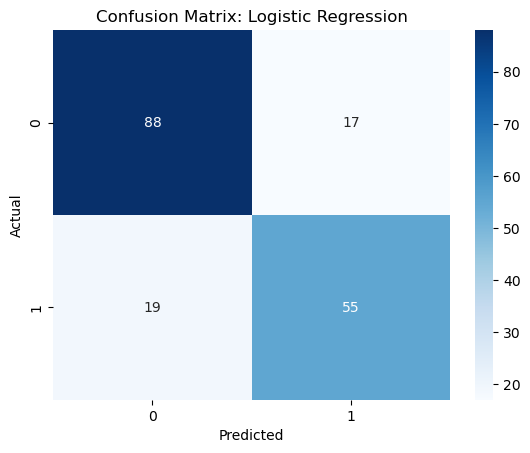

In [7]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix for better visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Understanding Logistic Regression's Performance
Logistic regression is a classification algorithm that predicts probabilities for binary outcomes (like "Survived" or "Not Survived"). It works by fitting a logistic curve to the data and finding the optimal coefficients for each predictor.

The model's accuracy of 0.79 is a good baseline, indicating that 79% of the predictions were correct. However, there is always room for improvement. Here are some factors contributing to the model's performance and ways to improve it

# Data Quality and Preprocessing
Handling Missing Data: If there are still missing values in the dataset, this could lead to errors or reduced model accuracy. Ensure all missing values are addressed, either by filling with a specific value (like the median) or removing incomplete rows.

Feature Scaling: Standardizing the data (as you did with StandardScaler) is crucial, especially when working with different scales among predictors. Ensure this is done consistently across the training and test datasets.

One-Hot Encoding: Converting categorical variables into dummy variables (as done with sex and embarked) is essential for logistic regression to work properly.

# Feature Engineering
Selecting Relevant Features: Including only relevant features helps avoid overfitting and improves model performance. Consider adding more features that could contribute to the prediction, such as sibsp (number of siblings/spouses aboard), parch (number of parents/children aboard), or class (the class of the passenger).

Creating New Features: You can create new features by combining or transforming existing ones. For example, family_size = sibsp + parch + 1 can be an interesting variable to understand survival based on family relationships.

# Improved Model with Additional Features and Regularization
Let's adjust your code to improve model performance by adding more features and regularization.

Accuracy: 0.8100558659217877


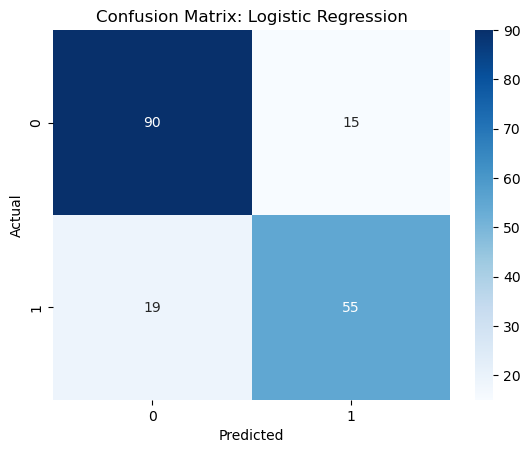

In [8]:
# Updated Features
X = titanic[['age', 'fare', 'pclass', 'sex_male', 'embarked_Q', 'embarked_S', 'sibsp', 'parch']]

# Splitting and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training with Regularization
log_reg = LogisticRegression(penalty='l2', C=1.0)  # L2 regularization
log_reg.fit(X_train_scaled, y_train)

# Making Predictions and Evaluating
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
